In [ ]:
!pip install -qU beyondllm llama-index-embeddings-huggingface groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 3.2 MB/s eta 0:00:00


In [ ]:
from beyondllm import source, embeddings, retrieve, llms, generator
import os
from getpass import getpass

os.environ['HUGGINGFACE_ACCESS_TOKEN'] = getpass("Enter your HF API token:")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /usr/local/lib/python3.10/dist-
[nltk_data]     packages/llama_index/core/_static/nltk_cache...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Enter your HF API token:··········


In [ ]:
data = source.fit(path="/content/drive/MyDrive/Data/MSFT-10-k-2023.pdf",
                  dtype="pdf",chunk_size=1024, chunk_overlap=0)


In [ ]:
from beyondllm.embeddings import HuggingFaceEmbeddings

model_name = 'BAAI/bge-small-en-v1.5'
embed_model = HuggingFaceEmbeddings(model_name=model_name)

In [ ]:
from beyondllm.retrieve import auto_retriever
retriever = auto_retriever(data=data, embed_model=embed_model, type="cross-rerank", top_k=2)

In [ ]:
import os
from getpass import getpass

os.environ['GROQ_API_KEY'] = getpass("Enter your Groq API key securely: ")
from beyondllm.llms import GroqModel

Enter your Groq API key securely: ··········


In [ ]:
llm = GroqModel(
    model='llama3-70b-8192',
    groq_api_key=os.getenv('GROQ_API_KEY'),
    )

# from beyondllm.llms import HuggingFaceHubModel

# llm = HuggingFaceHubModel(model="mistralai/Mistral-7B-Instruct-v0.2")

In [ ]:
from beyondllm.generator import Generate

system_prompt = f"""
<s>[INST]
You are an AI Assistant.
Please provide direct answers to questions.
[/INST]
</s>
"""

In [ ]:
pipeline = Generate(
    question="""What specific initiatives has Microsoft undertaken to address
    racial injustice and inequity in the United States?""",
    retriever=retriever,
    system_prompt=system_prompt,
    llm=llm
)

print(pipeline.call())

According to the text, Microsoft has undertaken several initiatives to address racial injustice and inequity in the United States, including:

1. Strengthening communities: using data, technology, and partnerships to help improve the lives of Black and African American people in the United States.

2. Engaging ecosystem: using balance sheet and relationships with suppliers and partners to foster societal change and create new opportunities.

3. Increasing representation and strengthening inclusion: building on momentum by adding a $150 million investment to strengthen inclusion and double the number of Black, African American, Hispanic, and Latinx leaders in the United States by 2025.

Some specific programs and achievements mentioned include:

* Working with 103 unique organizations in 165 cities and counties on the Justice Reform Initiative to empower communities and advance racial equity and fairness in the justice system.
* Increasing access to affordable broadband, devices, and di

In [ ]:
print(pipeline.get_rag_triad_evals())

Executing RAG Triad Evaluations...
Context relevancy Score: 8.0
This response meets the evaluation threshold. It demonstrates strong comprehension and coherence.
Answer relevancy Score: 9.0
This response meets the evaluation threshold. It demonstrates strong comprehension and coherence.
Groundness score: 8.2
This response meets the evaluation threshold. It demonstrates strong comprehension and coherence.


# Results


In [ ]:
import pandas as pd

# Load the Simple RAG results from the uploaded Excel file
simple_rag_path = "/content/drive/MyDrive/Data/simple_rag.csv"
simple_rag_df = pd.read_csv(simple_rag_path)

# Display the first few rows of the Simple RAG dataset to understand its structure
simple_rag_df.head()


,Qno,Question,Context relevancy Score,Answer relevancy Score,Groundness score
0,1,What were Microsoft's total revenue and net in...,9.0,10,10.0
1,2,How did the revenue and operating income of Mi...,10.0,10,7.9
2,3,What was the total revenue generated by Micros...,10.0,10,7.9
3,4,What factors contributed to the revenue growth...,8.5,10,10.0
4,5,What were the reasons for the decline in reven...,9.0,10,9.3


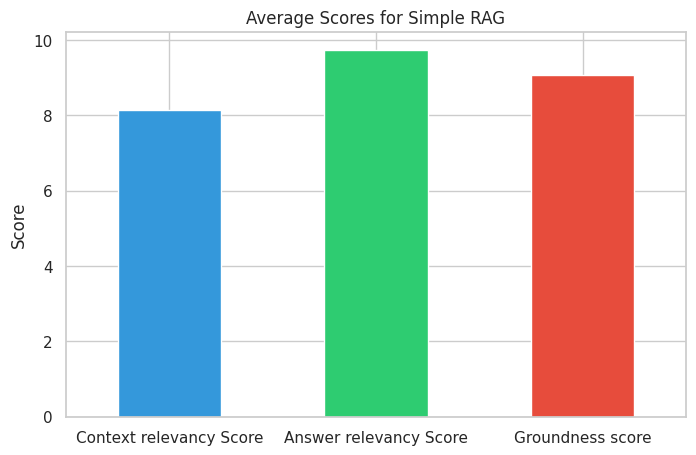

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for scores
summary_stats = simple_rag_df[['Context relevancy Score', 'Answer relevancy Score', 'Groundness score']].describe()

# Set up Seaborn style
sns.set(style="whitegrid")

# Plot average scores
average_scores = simple_rag_df[['Context relevancy Score', 'Answer relevancy Score', 'Groundness score']].mean()
plt.figure(figsize=(8, 5))
average_scores.plot(kind='bar', color=['#3498db', '#2ecc71', '#e74c3c'])
plt.title("Average Scores for Simple RAG")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

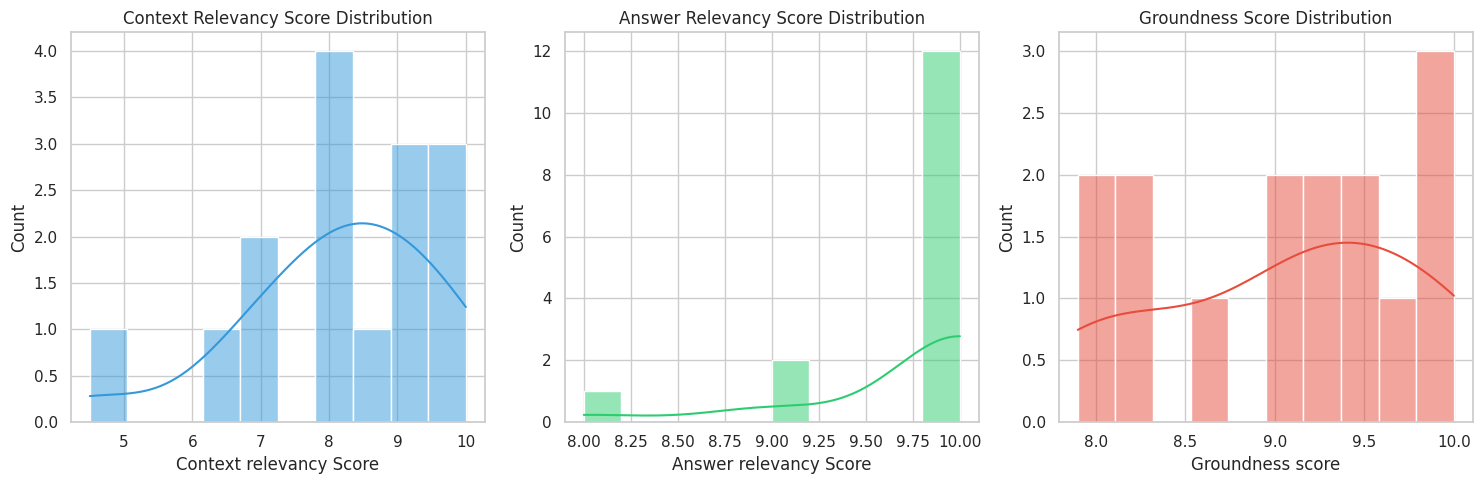

In [ ]:
# Plot the distribution of scores
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(simple_rag_df['Context relevancy Score'], bins=10, kde=True, ax=axes[0], color='#3498db')
axes[0].set_title("Context Relevancy Score Distribution")
sns.histplot(simple_rag_df['Answer relevancy Score'], bins=10, kde=True, ax=axes[1], color='#2ecc71')
axes[1].set_title("Answer Relevancy Score Distribution")
sns.histplot(simple_rag_df['Groundness score'], bins=10, kde=True, ax=axes[2], color='#e74c3c')
axes[2].set_title("Groundness Score Distribution")
plt.tight_layout()
plt.show()



In [ ]:
summary_stats

,Context relevancy Score,Answer relevancy Score,Groundness score
count,15.000000,15.000000,15.000000
mean,8.133333,9.733333,9.066667
std,1.457330,0.593617,0.742262
min,4.500000,8.000000,7.900000
25%,7.500000,10.000000,8.450000
50%,8.000000,10.000000,9.200000
75%,9.000000,10.000000,9.550000
max,10.000000,10.000000,10.000000


# Results - HyDE RAG

In [ ]:
import pandas as pd

hyde_rag_path = "/content/drive/MyDrive/Data/hyde_rag_results.csv"
hyde_rag_df = pd.read_csv(hyde_rag_path)
hyde_rag_df.head()

,Qno,Question,Context relevancy Score,Answer relevancy Score,Groundness score
0,1,What were Microsoft's total revenue and net in...,9.8,10.0,10.0
1,2,How did the revenue and operating income of Mi...,10.0,10.0,8.9
2,3,What was the total revenue generated by Micros...,10.0,10.0,8.7
3,4,What factors contributed to the revenue growth...,9.3,10.0,10.0
4,5,What were the reasons for the decline in reven...,9.7,10.0,9.2


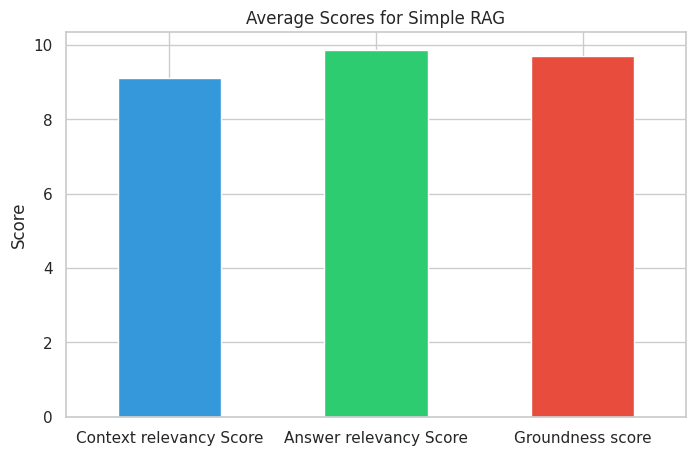

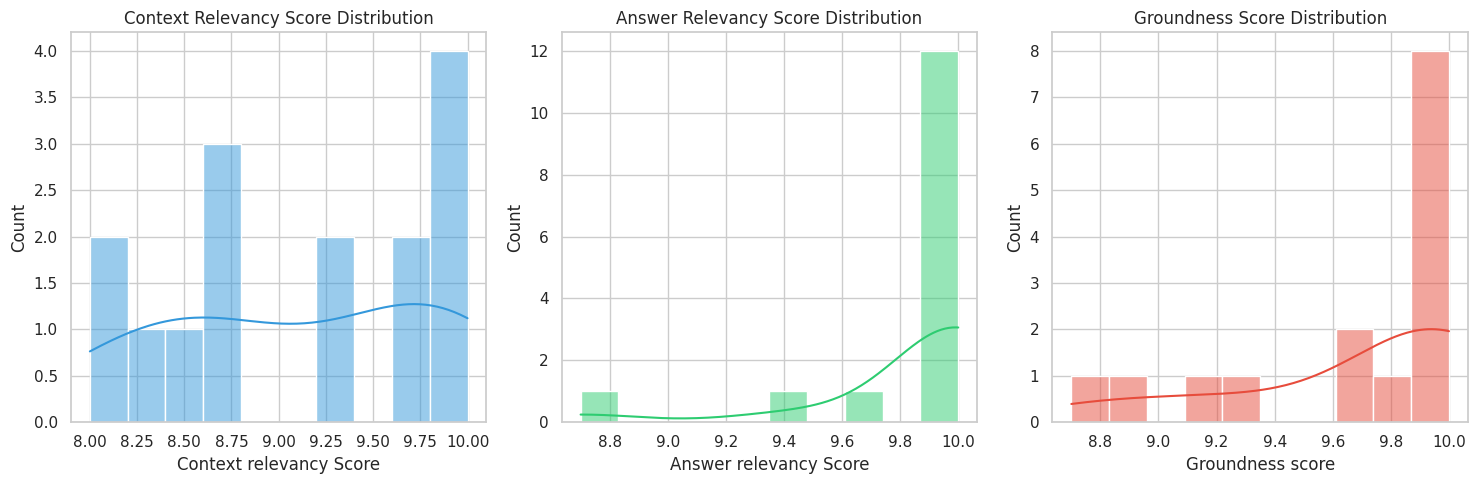

,Context relevancy Score,Answer relevancy Score,Groundness score
count,15.000000,15.000000,15.000000
mean,9.113333,9.853333,9.686667
std,0.737628,0.360291,0.445400
min,8.000000,8.700000,8.700000
25%,8.600000,10.000000,9.500000
50%,9.300000,10.000000,10.000000
75%,9.750000,10.000000,10.000000
max,10.000000,10.000000,10.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for scores
summary_stats = hyde_rag_df[['Context relevancy Score', 'Answer relevancy Score', 'Groundness score']].describe()

# Set up Seaborn style
sns.set(style="whitegrid")

# Plot average scores
average_scores = hyde_rag_df[['Context relevancy Score', 'Answer relevancy Score', 'Groundness score']].mean()
plt.figure(figsize=(8, 5))
average_scores.plot(kind='bar', color=['#3498db', '#2ecc71', '#e74c3c'])
plt.title("Average Scores for HyDE RAG")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

# Plot the distribution of scores
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(hyde_rag_df['Context relevancy Score'], bins=10, kde=True, ax=axes[0], color='#3498db')
axes[0].set_title("Context Relevancy Score Distribution")
sns.histplot(hyde_rag_df['Answer relevancy Score'], bins=10, kde=True, ax=axes[1], color='#2ecc71')
axes[1].set_title("Answer Relevancy Score Distribution")
sns.histplot(hyde_rag_df['Groundness score'], bins=10, kde=True, ax=axes[2], color='#e74c3c')
axes[2].set_title("Groundness Score Distribution")
plt.tight_layout()
plt.show()

summary_stats


# Analysis


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
plt.style.use('seaborn-v0_8-whitegrid')

# Prepare data
metrics = ['Context Relevancy', 'Answer Relevancy', 'Groundness']
hyde_scores = [9.2, 9.9, 9.5]
simple_scores = [8.3, 9.6, 8.7]

# Detailed category data
categories = [
    'Total Revenue & Net Income',
    'Segment Performance',
    'Cloud Revenue',
    'Sustainability Goals',
    'R&D Insights'
]
hyde_category_scores = [9.8, 9.3, 9.5, 8.0, 8.3]
simple_category_scores = [9.0, 8.8, 9.0, 4.5, 6.5]

# Create a figure with subplots
plt.figure(figsize=(20, 15))

# 1. Bar Plot: Overall Metrics Comparison
plt.subplot(2, 2, 1)
x = np.arange(len(metrics))
width = 0.35
plt.bar(x - width/2, hyde_scores, width, label='HyDE', color='#1E90FF', alpha=0.7)
plt.bar(x + width/2, simple_scores, width, label='Simple RAG', color='#FF6347', alpha=0.7)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Overall RAG Performance Metrics')
plt.xticks(x, metrics, rotation=45)
plt.legend()
plt.ylim(0, 10)

# 2. Line Plot: Detailed Performance Comparison
plt.subplot(2, 2, 2)
plt.plot(categories, hyde_category_scores, marker='o', label='HyDE', color='#1E90FF', linewidth=2)
plt.plot(categories, simple_category_scores, marker='o', label='Simple RAG', color='#FF6347', linewidth=2)
plt.xlabel('Categories')
plt.ylabel('Performance Score')
plt.title('Detailed Performance Across Categories')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.ylim(0, 10)

# 3. Heatmap: Performance Comparison
plt.subplot(2, 2, 3)
comparison_data = pd.DataFrame({
    'Metrics': metrics,
    'HyDE': hyde_scores,
    'Simple RAG': simple_scores
})
comparison_data_melted = pd.melt(comparison_data, id_vars='Metrics', var_name='Method', value_name='Score')
comparison_pivot = comparison_data_melted.pivot(index='Metrics', columns='Method', values='Score')
sns.heatmap(comparison_pivot, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Performance Score'})
plt.title('Performance Heatmap: HyDE vs Simple RAG')

# 4. Pie Chart: Improvement Distribution
plt.subplot(2, 2, 4)
improvement_data = [70, 30]
improvement_labels = ['HyDE Improvements', 'Simple RAG Base']
colors = ['#1E90FF', '#FF6347']
plt.pie(improvement_data, labels=improvement_labels, colors=colors, autopct='%1.1f%%')
plt.title('Performance Improvement Distribution')

# Adjust layout and save
plt.tight_layout()
plt.savefig('rag_performance_comparison.png', dpi=300)
plt.close()

print("Visualization completed and saved as 'rag_performance_comparison.png'")

Visualization completed and saved as 'rag_performance_comparison.png'


In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Load datasets
simple_rag_path = "/content/drive/MyDrive/Data/simple_rag.csv"
hyde_rag_path = "/content/drive/MyDrive/Data/hyde_rag_results.csv"

simple_rag_df = pd.read_csv(simple_rag_path)
hyde_rag_df = pd.read_csv(hyde_rag_path)

# Compute average scores
simple_avg_scores = simple_rag_df[['Context relevancy Score', 'Answer relevancy Score', 'Groundness score']].mean()
hyde_avg_scores = hyde_rag_df[['Context relevancy Score', 'Answer relevancy Score', 'Groundness score']].mean()

# Prepare data for grouped bar plot
score_types = simple_avg_scores.index

# Create grouped bar plot
fig = go.Figure(data=[
    go.Bar(name='Simple RAG', x=score_types, y=simple_avg_scores.values,
           text=[f'{score:.2f}' for score in simple_avg_scores.values],
           textposition='auto', marker_color=['blue', 'blue', 'blue']),
    go.Bar(name='HyDE RAG', x=score_types, y=hyde_avg_scores.values,
           text=[f'{score:.2f}' for score in hyde_avg_scores.values],
           textposition='auto', marker_color=['red', 'red', 'red'])
])

# Customize the plot
fig.update_layout(
    title='Comparison of RAG Scores: Simple RAG vs HyDE RAG',
    xaxis_title='Score Type',
    yaxis_title='Average Score',
    barmode='group'
)

# Display the plot
fig.show()

# Print summary statistics for additional context
print("Simple RAG Summary Statistics:")
print(simple_rag_df[['Context relevancy Score', 'Answer relevancy Score', 'Groundness score']].describe())
print("\nHyDE RAG Summary Statistics:")
print(hyde_rag_df[['Context relevancy Score', 'Answer relevancy Score', 'Groundness score']].describe())

Simple RAG Summary Statistics:
       Context relevancy Score  Answer relevancy Score  Groundness score
count                15.000000               15.000000         15.000000
mean                  8.133333                9.733333          9.066667
std                   1.457330                0.593617          0.742262
min                   4.500000                8.000000          7.900000
25%                   7.500000               10.000000          8.450000
50%                   8.000000               10.000000          9.200000
75%                   9.000000               10.000000          9.550000
max                  10.000000               10.000000         10.000000

HyDE RAG Summary Statistics:
       Context relevancy Score  Answer relevancy Score  Groundness score
count                15.000000               15.000000         15.000000
mean                  9.113333                9.853333          9.686667
std                   0.737628                0.360291         